# House Price Prediction with Linear Regression

![](https://i.imgur.com/3sw1fY9.jpg)

We're going to predict the price of a house using information like its location, area, no. of rooms etc. You'll use the dataset from the [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) competition on [Kaggle](https://kaggle.com). We'll follow a step-by-step process to train our model:

1. Download and explore the data
2. Prepare the dataset for training
3. Train a linear regression model
4. Make predictions and evaluate the model

### Download and explore the data

In [14]:
import opendatasets as od
from urllib.request import urlretrieve
from zipfile import ZipFile
import os
import pandas as pd

In [3]:
dataset_url = 'https://github.com/JovianML/opendatasets/raw/master/data/house-prices-advanced-regression-techniques.zip'

In [7]:
urlretrieve(dataset_url, 'house-prices.zip')

('house-prices.zip', <http.client.HTTPMessage at 0x2265beb26a0>)

In [10]:
with ZipFile('house-prices.zip') as f:
    f.extractall(path = 'house_prices')

In [13]:
data_dir = 'house_prices'
os.listdir(data_dir)

['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']

In [17]:
train_csv_path = data_dir + '/train.csv'
train_csv_path

'house_prices/train.csv'

In [19]:
prices_df = pd.read_csv(train_csv_path)
prices_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [48]:
n_rows = prices_df.shape[0]
n_cols = prices_df.shape[1]
print('The dataset contains {} rows and {} columns.'.format(n_rows, n_cols))

The dataset contains 1460 rows and 81 columns.


In [20]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [21]:
prices_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [24]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
fig = px.histogram(prices_df, x='LotArea', y='SalePrice', title='Lot area vs Price')
fig.update_layout(bargap=0.1)
fig.show()

In [35]:
fig = px.histogram(prices_df, x='LotFrontage', y='SalePrice', title='Lot frontage vs Price')
fig.update_layout(bargap=0.1)
fig.show()

In the above analysis, we see that prices are high until some increase in lot area and lot frontage but decreases after it, this could be due to he effect of other factors like neighborhood or pool area or maybe year sold. 

In [27]:
prices_df.SalePrice.corr(prices_df.LotArea)

0.2638433538714056

In [28]:
prices_df.SalePrice.corr(prices_df.LotFrontage)

0.35179909657067804

In [29]:
prices_df.SalePrice.corr(prices_df.OverallCond)

-0.077855894048678

In [30]:
prices_df.SalePrice.corr(prices_df.PoolArea)

0.09240354949187322

In [76]:
# Get the entire correlation matrix
correlation_matrix = prices_df.corr()

In [77]:
# Get the correlation values with SalePrice
correlation_data = correlation_matrix['SalePrice']

In [84]:
# Create a DataFrame
correlation_df = pd.Series(correlation_data).sort_values()

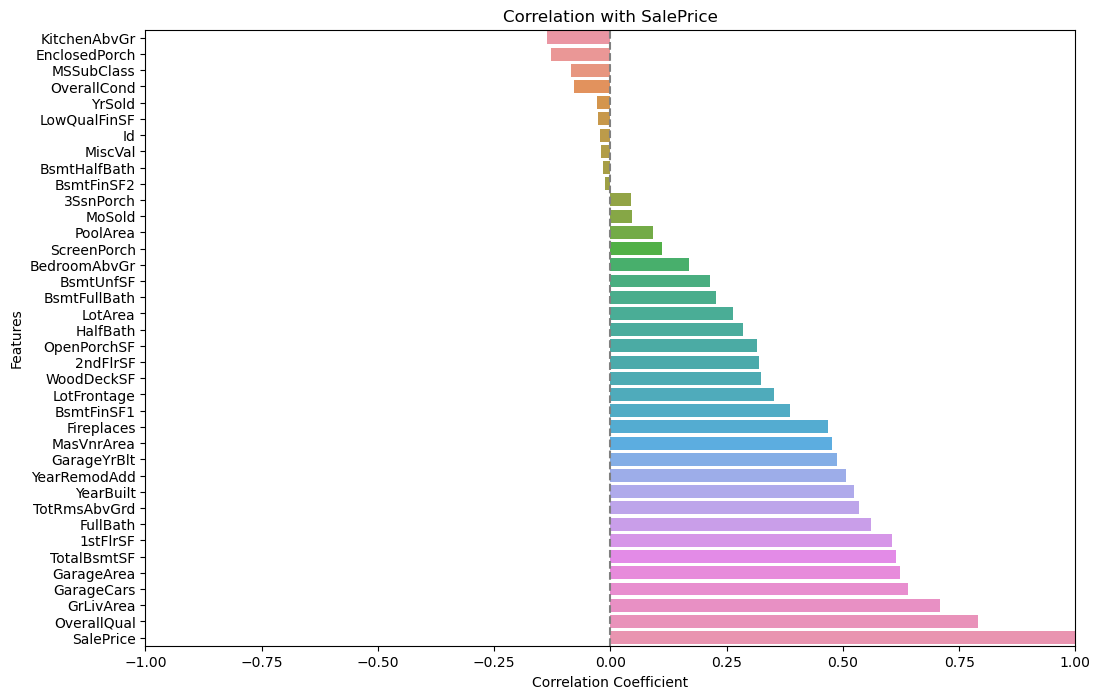

In [85]:
# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=correlation_df.values, y=correlation_df.index)
plt.title('Correlation with SalePrice')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.axvline(0, color='grey', linestyle='--')
plt.xlim(-1, 1)
plt.show()

From the above figure, we can observe which factors have the most correlation and thus affect SalePrce the most.

### Preparing dataset for training

In [139]:
# Separating input and target dataframes

input_df = prices_df[prices_df.columns[1:-1]]
target_df = prices_df.SalePrice

In [161]:
# Separating numeric and categorical columns

numeric_cols = input_df.select_dtypes(np.number).columns.tolist()
categorical_cols = input_df.select_dtypes('object').columns.tolist()

#### 1. Imputing

In [123]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [124]:
imputer = SimpleImputer(strategy='mean')

In [133]:
imputer.fit(input_df[numeric_cols])

SimpleImputer()

In [142]:
input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])

C:\Users\Asus\AppData\Local\Temp\ipykernel_14716\3299223154.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [135]:
input_df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64

In [143]:
# To make sure that there are no null values at all 
missing_counts = input_df[numeric_cols].isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

Series([], dtype: int64)

#### 2. Scaling

In [144]:
scaler = MinMaxScaler()

In [146]:
scaler.fit(input_df[numeric_cols])

MinMaxScaler()

In [154]:
input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])

C:\Users\Asus\AppData\Local\Temp\ipykernel_14716\3754323680.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [156]:
input_df[numeric_cols]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,0.000000,...,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.00000,0.090909,0.50
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.173281,0.000000,...,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.363636,0.25
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.086109,0.000000,...,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.00000,0.727273,0.50
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.038271,0.000000,...,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.00000,0.090909,0.00
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.116052,0.000000,...,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.00000,1.000000,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.140411,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,0.000000,...,0.324401,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.00000,0.636364,0.25
1456,0.000000,0.219178,0.055505,0.555556,0.625,0.768116,0.633333,0.074375,0.139972,0.110583,...,0.352609,0.407235,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.090909,1.00
1457,0.294118,0.154110,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.048724,0.000000,...,0.177715,0.000000,0.109689,0.000000,0.0,0.0,0.0,0.16129,0.363636,1.00
1458,0.000000,0.160959,0.039342,0.444444,0.625,0.565217,0.766667,0.000000,0.008682,0.698100,...,0.169252,0.427071,0.000000,0.202899,0.0,0.0,0.0,0.00000,0.272727,1.00


In [158]:
input_df[numeric_cols].describe().loc[['min', 'max']]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### 3. Encoding

In [173]:
input_df[categorical_cols].nunique().sort_values(ascending=False)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
SaleType          9
Condition1        9
Condition2        8
HouseStyle        8
RoofMatl          8
Functional        7
BsmtFinType2      6
Heating           6
RoofStyle         6
SaleCondition     6
BsmtFinType1      6
GarageType        6
Foundation        6
Electrical        5
FireplaceQu       5
HeatingQC         5
GarageQual        5
GarageCond        5
MSZoning          5
LotConfig         5
ExterCond         5
BldgType          5
BsmtExposure      4
MiscFeature       4
Fence             4
LotShape          4
LandContour       4
BsmtCond          4
KitchenQual       4
MasVnrType        4
ExterQual         4
BsmtQual          4
LandSlope         3
GarageFinish      3
PavedDrive        3
PoolQC            3
Utilities         2
CentralAir        2
Street            2
Alley             2
dtype: int64

In [168]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [169]:
encoder.fit(input_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [175]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
len(encoded_cols)

268

In [177]:
input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])

#### 4. Training and validation set

In [181]:
from sklearn.model_selection import train_test_split

In [184]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(input_df[numeric_cols + encoded_cols], 
                                                                        target_df, 
                                                                        test_size=0.25, 
                                                                        random_state=42)

### Training a linear Regression model

We'll use Ridge Regression, a variant of linear regression that uses a technique called L2 regularization to introduce another loss term that forces the model to generalize better. Learn more about ridge regression here: https://www.youtube.com/watch?v=Q81RR3yKn30

In [190]:
from sklearn.linear_model import Ridge

In [191]:
model = Ridge()

In [192]:
model.fit(train_inputs, train_targets)

Ridge()

### Make predictions

In [194]:
from sklearn.metrics import mean_squared_error, accuracy_score

In [195]:
train_preds = model.predict(train_inputs)

In [196]:
mean_squared_error(train_preds,train_targets)

478640340.3394975

In [204]:
val_preds = model.predict(val_inputs)

In [205]:
mean_squared_error(val_preds,val_targets)

841539632.573437

In [207]:
weights_df = pd.DataFrame({
    'columns': train_inputs.columns,
    'weight': model.coef_
}).sort_values('weight', ascending=False)

In [208]:
weights_df

,columns,weight
275,PoolQC_Ex,77483.612175
15,GrLivArea,74388.503609
13,2ndFlrSF,62433.996447
3,OverallQual,62055.123269
12,1stFlrSF,60726.614752
...,...,...
266,GarageCond_Ex,-21028.480031
21,KitchenAbvGr,-26474.353422
277,PoolQC_Gd,-72681.458501
102,Condition2_PosN,-84704.714012


In [209]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols].values)
    X_input = input_df[numeric_cols + encoded_cols]
    return model.predict(X_input)[0]

In [210]:
sample_input = { 'MSSubClass': 20, 'MSZoning': 'RL', 'LotFrontage': 77.0, 'LotArea': 9320,
 'Street': 'Pave', 'Alley': None, 'LotShape': 'IR1', 'LandContour': 'Lvl', 'Utilities': 'AllPub',
 'LotConfig': 'Inside', 'LandSlope': 'Gtl', 'Neighborhood': 'NAmes', 'Condition1': 'Norm', 'Condition2': 'Norm',
 'BldgType': '1Fam', 'HouseStyle': '1Story', 'OverallQual': 4, 'OverallCond': 5, 'YearBuilt': 1959,
 'YearRemodAdd': 1959, 'RoofStyle': 'Gable', 'RoofMatl': 'CompShg', 'Exterior1st': 'Plywood',
 'Exterior2nd': 'Plywood', 'MasVnrType': 'None','MasVnrArea': 0.0,'ExterQual': 'TA','ExterCond': 'TA',
 'Foundation': 'CBlock','BsmtQual': 'TA','BsmtCond': 'TA','BsmtExposure': 'No','BsmtFinType1': 'ALQ',
 'BsmtFinSF1': 569,'BsmtFinType2': 'Unf','BsmtFinSF2': 0,'BsmtUnfSF': 381,
 'TotalBsmtSF': 950,'Heating': 'GasA','HeatingQC': 'Fa','CentralAir': 'Y','Electrical': 'SBrkr', '1stFlrSF': 1225,
 '2ndFlrSF': 0, 'LowQualFinSF': 0, 'GrLivArea': 1225, 'BsmtFullBath': 1, 'BsmtHalfBath': 0, 'FullBath': 1,
 'HalfBath': 1, 'BedroomAbvGr': 3, 'KitchenAbvGr': 1,'KitchenQual': 'TA','TotRmsAbvGrd': 6,'Functional': 'Typ',
 'Fireplaces': 0,'FireplaceQu': np.nan,'GarageType': np.nan,'GarageYrBlt': np.nan,'GarageFinish': np.nan,'GarageCars': 0,
 'GarageArea': 0,'GarageQual': np.nan,'GarageCond': np.nan,'PavedDrive': 'Y', 'WoodDeckSF': 352, 'OpenPorchSF': 0,
 'EnclosedPorch': 0,'3SsnPorch': 0, 'ScreenPorch': 0, 'PoolArea': 0, 'PoolQC': np.nan, 'Fence': np.nan, 'MiscFeature': 'Shed',
 'MiscVal': 400, 'MoSold': 1, 'YrSold': 2010, 'SaleType': 'WD', 'SaleCondition': 'Normal'}

In [212]:
predicted_price = predict_input(sample_input)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names

C:\Users\Asus\AppData\Local\Temp\ipykernel_14716\599193421.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Asus\AppData\Local\Temp\ipykernel_14716\599193421.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Asus\AppData\Local\Temp\ipykernel_14716\599193421.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of 

In [213]:
print('The predicted sale price of the house is ${}'.format(predicted_price))

The predicted sale price of the house is $123884.4844977835


### Saving model

In [214]:
import joblib

In [216]:
house_price_predictor = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [217]:
joblib.dump(house_price_predictor, 'house_price_predictor.joblib')

['house_price_predictor.joblib']